### 12-2. Boston 주택 가격 예측 모델

In [1]:
from tensorflow.keras import models, layers, Input
import matplotlib.pyplot as plt

2025-09-26 13:00:58.422231: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-26 13:00:58.431581: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758859258.442956   46862 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758859258.446821   46862 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-09-26 13:00:58.463244: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [3]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
train_data = train_data/std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data = test_data - mean
test_data = test_data/std

In [4]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.

model = models.Sequential()
model.add(Input(shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='adam',loss='mse',metrics=['mae'])
model.summary()

I0000 00:00:1758859261.576437   46862 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 21456 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(train_data, train_labels, epochs=100, 
                    batch_size=10,validation_split=0.2) 

Epoch 1/100


I0000 00:00:1758859263.443323   46981 service.cc:148] XLA service 0x77cd54009780 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758859263.443365   46981 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2025-09-26 13:01:03.474413: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1758859263.553147   46981 cuda_dnn.cc:529] Loaded cuDNN version 91300


30/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 623.1948 - mae: 22.7125

I0000 00:00:1758859263.993847   46981 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


33/33 ━━━━━━━━━━━━━━━━━━━━ -2s -98496us/step - loss: 540.8738 - mae: 21.3140 - val_loss: 553.0519 - val_mae: 21.5942
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 407.5003 - mae: 17.7523 - val_loss: 363.2018 - val_mae: 16.6961
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 199.8932 - mae: 11.7060 - val_loss: 133.7798 - val_mae: 9.1529
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 70.3895 - mae: 6.3901 - val_loss: 57.1271 - val_mae: 5.8120
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 38.2344 - mae: 4.4414 - val_loss: 32.3625 - val_mae: 4.2404
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25.7974 - mae: 3.5517 - val_loss: 24.0351 - val_mae: 3.6192
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20.6362 - mae: 3.0533 - val_loss: 20.6615 - val_mae: 3.3903
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.2528 - mae: 2.8935 - val_loss: 19.0852 - val_mae: 3.3052
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3

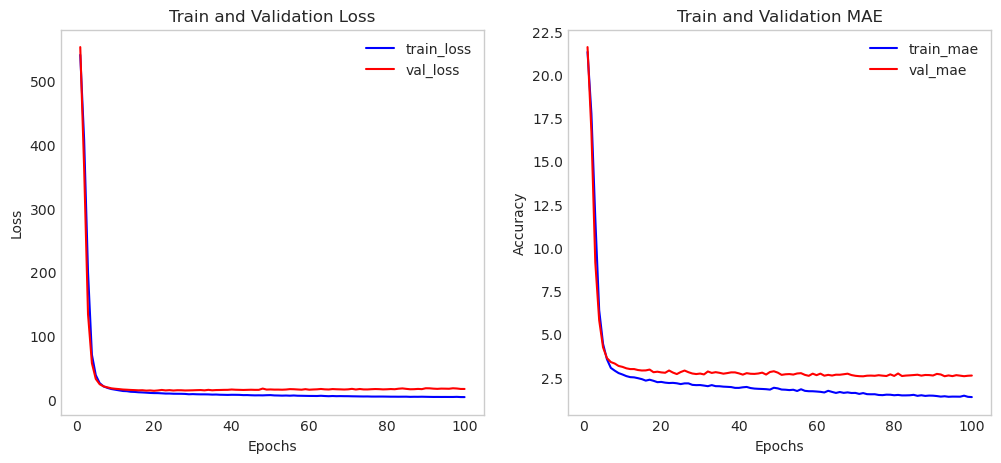

In [6]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-v0_8-whitegrid')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [7]:
test_loss, test_mae = model.evaluate(test_data, test_labels)
print("test loss:",test_loss)
print("test mae:",test_mae)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 20.6428 - mae: 2.7395 
test loss: 20.642778396606445
test mae: 2.7394797801971436


### 12-3. Reuters 딥러닝 모델

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [37]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

train_data , val_data, train_labels, val_labels = train_test_split(
    train_data, 
    train_labels, 
    test_size=0.25, 
    random_state=42 
)

print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

6736
2246
2246
46


In [10]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
from tensorflow.keras.utils import to_categorical

def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  
  for i, sequence in enumerate(data):
     results[i, sequence] = 1
  return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
y_train = to_categorical(train_labels)
y_val = to_categorical(val_labels)
y_test = to_categorical(test_labels)

In [11]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.

model = models.Sequential()
model.add(Input(shape=(10000,)))

model.add(layers.Dense(64))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(32))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │       640,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 46)             │         1,518 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 644,046 (2.46 MB)

 Trainable params: 643,854 (2.46 MB)

 Non-trainable params: 192 (768.00 B)

In [13]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from tensorflow.keras import callbacks

checkpoint_cb = callbacks.ModelCheckpoint('best_reuters_model.keras',monitor='val_loss',save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10,monitor='val_loss',restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=100,batch_size=10,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
674/674 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5707 - loss: 1.8764 - val_accuracy: 0.6981 - val_loss: 1.2751
Epoch 2/100
674/674 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6893 - loss: 1.2700 - val_accuracy: 0.7418 - val_loss: 1.0875
Epoch 3/100
674/674 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7277 - loss: 1.0846 - val_accuracy: 0.7774 - val_loss: 1.0076
Epoch 4/100
674/674 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7629 - loss: 0.9417 - val_accuracy: 0.7907 - val_loss: 0.9402
Epoch 5/100
674/674 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7913 - loss: 0.8199 - val_accuracy: 0.7992 - val_loss: 0.9211
Epoch 6/100
674/674 ━━━━━━━━━━━━━━━━━━━━ -1s -1146us/step - accuracy: 0.8113 - loss: 0.7303 - val_accuracy: 0.8010 - val_loss: 0.8917
Epoch 7/100
674/674 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8208 - loss: 0.6817 - val_accuracy: 0.8059 - val_loss: 0.8801
Epoch 8/100
674/674 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8385 - loss: 0.6000 - val

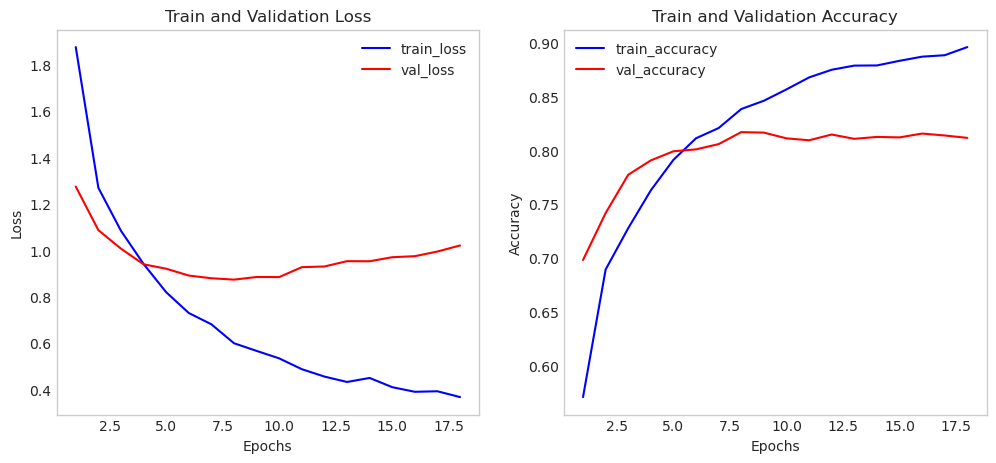

In [14]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-v0_8-whitegrid')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [15]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
test_loss, test_mae = model.evaluate(x_test, y_test)
print("test loss:",test_loss)
print("test mae:",test_mae)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7903 - loss: 0.9736   
test loss: 0.9736234545707703
test mae: 0.7902938723564148


### 12-4. CIFAR10 딥러닝 모델

In [16]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [17]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, 
    y_train_full, 
    test_size=0.2, 
    random_state=42 
)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [18]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

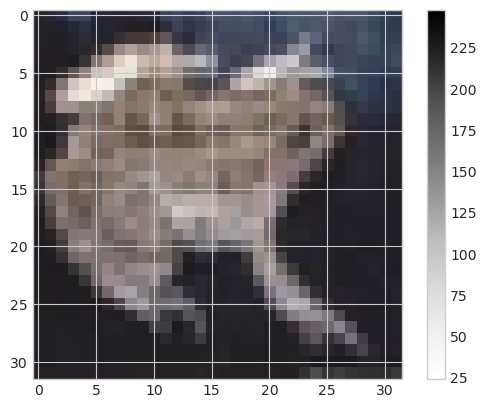

In [19]:
#랜덤으로 섞어서 사진이 다를 수 있음
plt.style.use('seaborn-v0_8-whitegrid')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [20]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [21]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape(x_train.shape[0], 3072)
x_val = x_val.reshape(x_val.shape[0], 3072)
x_test = x_test.reshape(x_test.shape[0], 3072) 

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [22]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [30]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)
model = models.Sequential()


model.add(Input(shape=(3072,)))

model.add(layers.Dense(256))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(32))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 825,706 (3.15 MB)

 Trainable params: 824,874 (3.15 MB)

 Non-trainable params: 832 (3.25 KB)

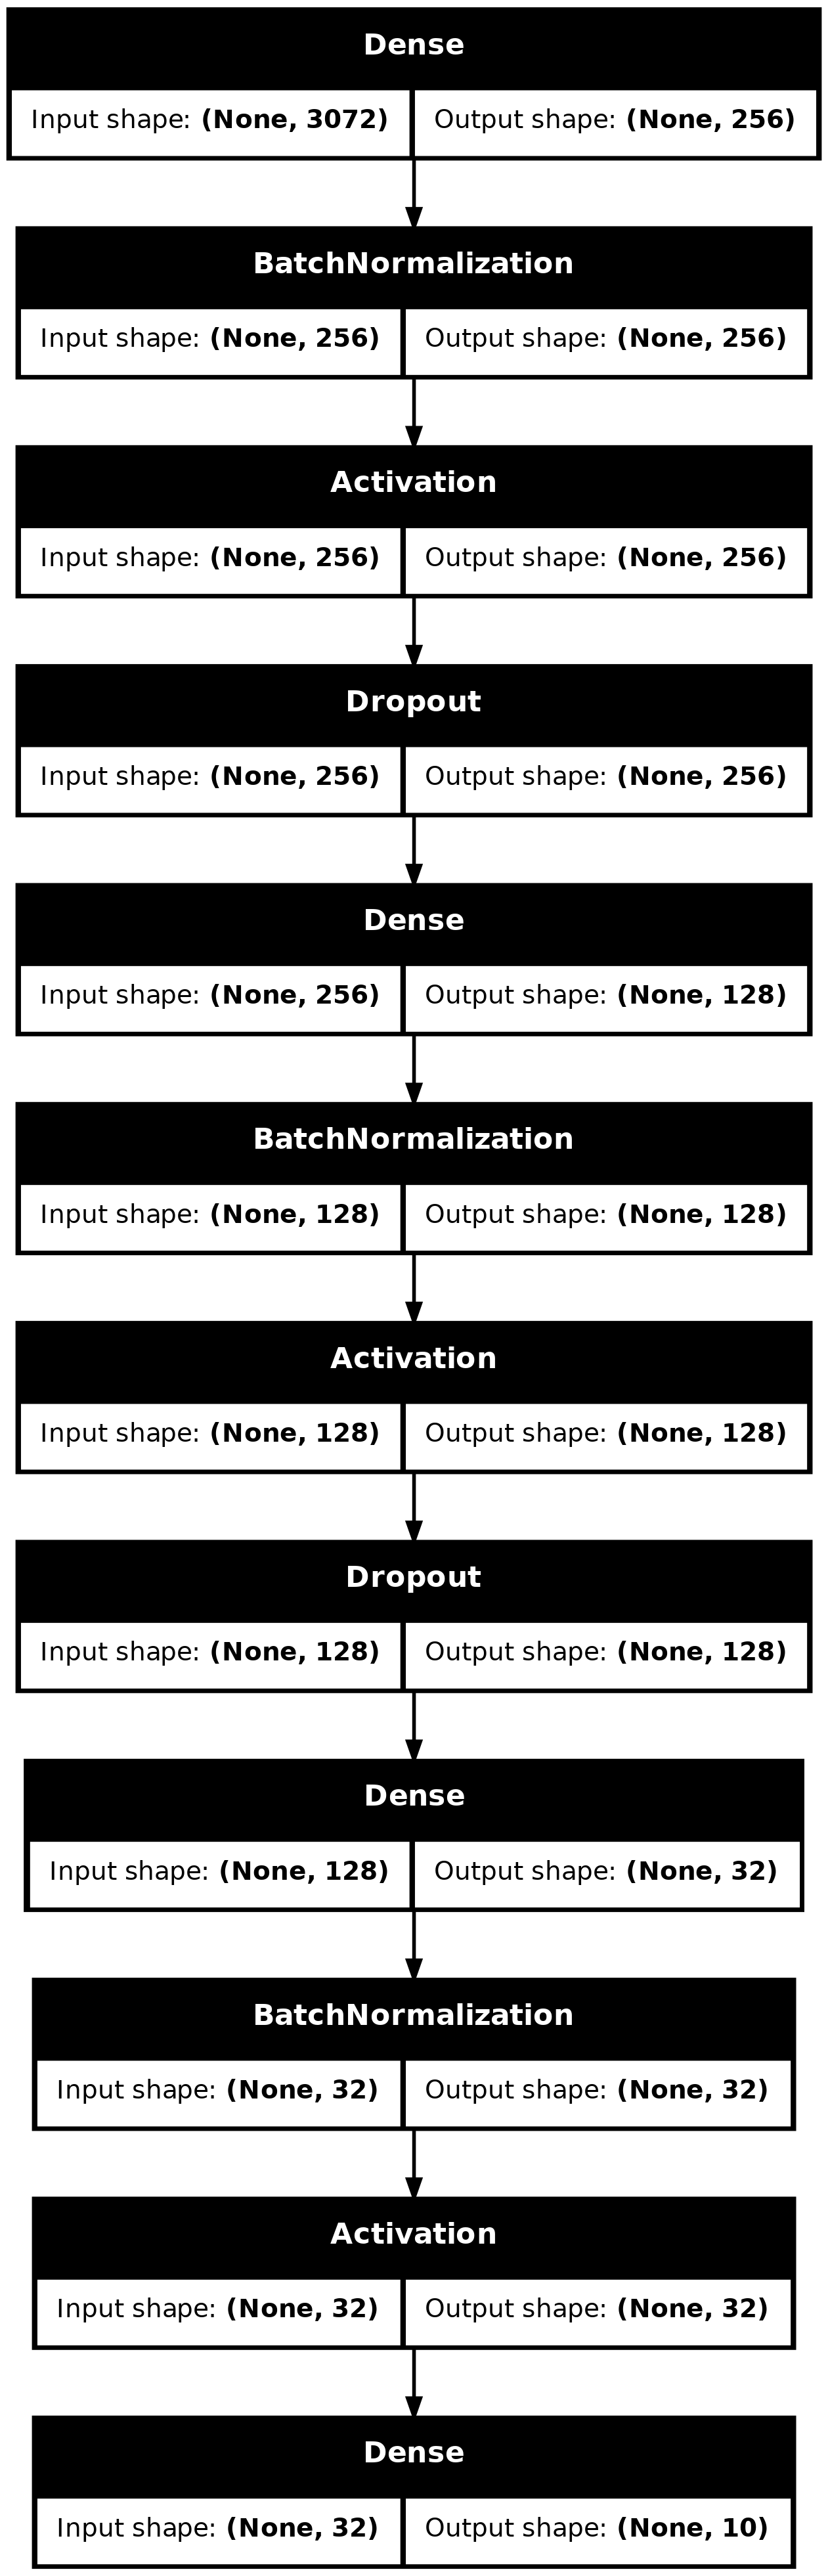

In [32]:
utils.plot_model(model, show_shapes=True)

In [33]:
checkpoint_cb = callbacks.ModelCheckpoint('best_cifar10_model.keras',monitor='val_loss',save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10,monitor='val_loss',restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=100,batch_size=10,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.2777 - loss: 2.0317 - val_accuracy: 0.3528 - val_loss: 1.8072
Epoch 2/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.3316 - loss: 1.8681 - val_accuracy: 0.4014 - val_loss: 1.6765
Epoch 3/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.3559 - loss: 1.8031 - val_accuracy: 0.4304 - val_loss: 1.6204
Epoch 4/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.3734 - loss: 1.7637 - val_accuracy: 0.4308 - val_loss: 1.6095
Epoch 5/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.3836 - loss: 1.7266 - val_accuracy: 0.4489 - val_loss: 1.5446
Epoch 6/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.3945 - loss: 1.7054 - val_accuracy: 0.4565 - val_loss: 1.5383
Epoch 7/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.4036 - loss: 1.6736 - val_accuracy: 0.4708 - val_loss: 1.5006
Epoch 8/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.4109 - lo

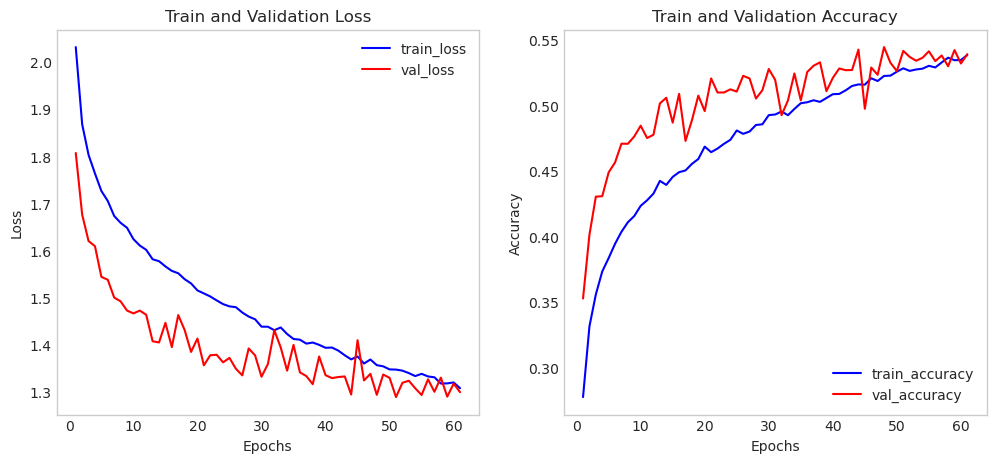

In [34]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-v0_8-whitegrid')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [35]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5370 - loss: 1.2805    


[1.2804604768753052, 0.5370000004768372]

### 12-4. CIFAR10 CNN 모델(추가)

In [46]:
#CNN 모델 
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, 
    y_train_full, 
    test_size=0.2, 
    random_state=42 
)

x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

model_cnn = models.Sequential()

model_cnn.add(Input(shape=(32, 32, 3)))

model_cnn.add(layers.Conv2D(32, (3, 3), padding='same')) 
model_cnn.add(layers.BatchNormalization())
model_cnn.add(layers.Activation('relu'))
model_cnn.add(layers.MaxPooling2D((2, 2)))

model_cnn.add(layers.Conv2D(64, (3, 3), padding='same')) 
model_cnn.add(layers.BatchNormalization())
model_cnn.add(layers.Activation('relu'))
model_cnn.add(layers.MaxPooling2D((2, 2)))

model_cnn.add(layers.Flatten()) 
model_cnn.add(layers.Dense(128, activation='relu'))
model_cnn.add(layers.Dropout(0.4))
model_cnn.add(layers.Dense(10, activation='softmax'))

model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

model_cnn.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,482 (2.08 MB)

 Trainable params: 545,290 (2.08 MB)

 Non-trainable params: 192 (768.00 B)

In [47]:
checkpoint_cb = callbacks.ModelCheckpoint('best_cifar10_model.keras',monitor='val_loss',save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10,monitor='val_loss',restore_best_weights=True)

history = model_cnn.fit(x_train, y_train, epochs=100,batch_size=16,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.2141 - loss: 1.9884 - val_accuracy: 0.2686 - val_loss: 1.8099
Epoch 2/100
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.2462 - loss: 1.8699 - val_accuracy: 0.3361 - val_loss: 1.7071
Epoch 3/100
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.2667 - loss: 1.8341 - val_accuracy: 0.3746 - val_loss: 1.6355
Epoch 4/100
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2838 - loss: 1.8036 - val_accuracy: 0.2472 - val_loss: 2.2365
Epoch 5/100
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3034 - loss: 1.7742 - val_accuracy: 0.4149 - val_loss: 1.5979
Epoch 6/100
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3192 - loss: 1.7500 - val_accuracy: 0.4406 - val_loss: 1.5687
Epoch 7/100
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3294 - loss: 1.7263 - val_accuracy: 0.4368 - val_loss: 1.5510
Epoch 8/100
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3544 - loss: 

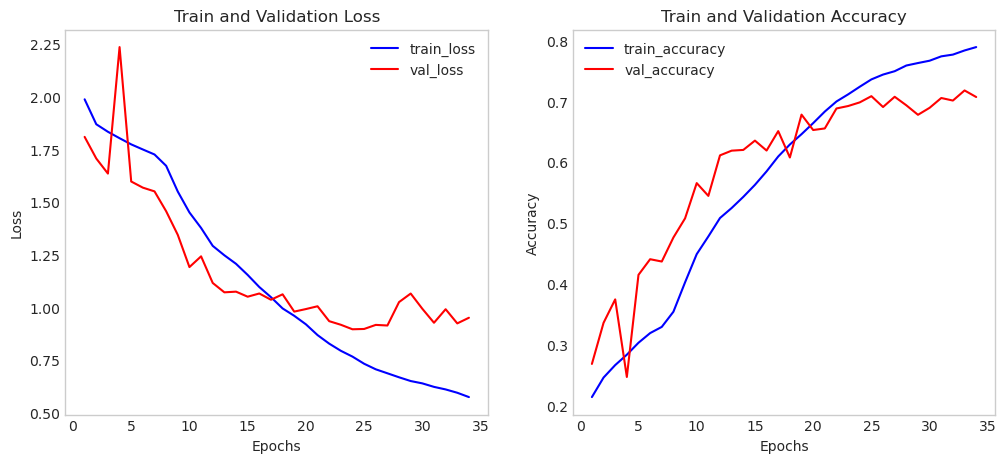

In [48]:
plt.style.use('seaborn-v0_8-whitegrid')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [49]:
model_cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6906 - loss: 0.9209    


[0.9209089875221252, 0.6905999779701233]